# Lista 5 - Exercício 1

Gere um conjunto de dados bidimensionais $X$ com 400 exemplos. Esses exemplos formam quatro grupos igualmente distribuídos seguindo distribuições Gaussianas dadas pelos parâmetros:

$$
\begin{align}
m_1 &= [0, 0]^T & m_2 &= [10, 0]^T & m_3 &= [0, 9]^T & m_4 &= [9, 8]^T \\
S_1 &= I & S_2 &= \begin{bmatrix}1 & 0.2 \\ 0.2 & 1.5\end{bmatrix} & S_3 &= \begin{bmatrix}1 & 0.4 \\ 0.4 & 1.1\end{bmatrix} & S_4 &= \begin{bmatrix}0.3 & 0.2 \\ 0.2 & 0.5\end{bmatrix} \\
\end{align}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal
from sklearn.cluster import KMeans
from skfuzzy.cluster import cmeans as CMeans

np.random.seed(42)

# Samples per class. There are 4 classes, totalling 400 data points
N = 100

mu = np.asarray([[0, 0], [10, 0], [0, 9], [9, 8]])
sigma = np.asarray([np.identity(2), [[1, 0.2], [0.2, 1.5]], [[1, 0.4], [0.4, 1.1]], [[0.3, 0.2], [0.2, 0.5]]])

X = np.vstack([multivariate_normal(mu_i, sigma_i, N) for mu_i, sigma_i in zip(mu,sigma)])
Y = [1] * N + [2] * N + [3] * N + [4] * N

Por conveniência, vamos definir uma função para plotar os dados, as médias reais das distribuições e os centros que o método encontrou:

In [2]:
def plot(X, mu, cluster_centers, model='KMeans'):
    plt.scatter(X[:, 0], X[:, 1], alpha=0.1, marker='.', label='Data points')
    plt.scatter(mu[:, 0], mu[:, 1], label='Gaussian means')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], label=model+' centers', marker='8')
    plt.xlim((-5, 20))
    plt.ylim((-5, 15))
    plt.legend()

**a)** Aplique o modelo K-Means com $m = 4$ (número de centros). Compare os centros obtidos pelo K-means com as médias das Gaussianas acima apresentadas. Plote os centros do K-Means e os parâmetros **m** das Gaussianas e compare as diferenças.

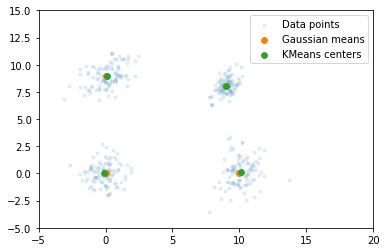

In [3]:
kmeans = KMeans(n_clusters=4, init='random').fit(X)

plot(X, mu, kmeans.cluster_centers_)

**b)** Repita o processo **(a)** para $m = 3$.

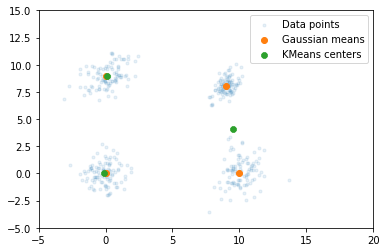

In [4]:
kmeans = KMeans(n_clusters=3, init='random').fit(X)

plot(X, mu, kmeans.cluster_centers_)

**c)** Repita o processo **(a)** para $m = 5$.

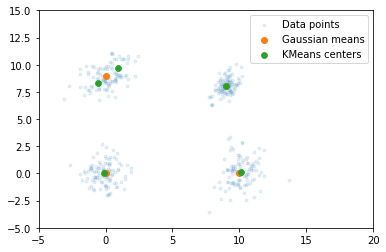

In [5]:
kmeans = KMeans(n_clusters=5, init='random').fit(X)

plot(X, mu, kmeans.cluster_centers_)

**d)** Repita o processo **(a)**, agoar inicializando o modelo K-Means com $[-2, -2]^T, [-2.1, -2.1]^T, [-2, -2.2]^T, [-2.1, -2.2]^T$.

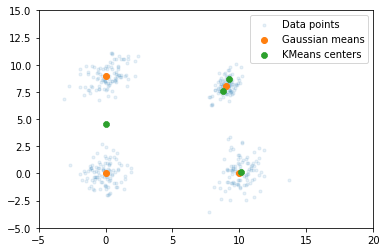

In [6]:
kmeans = KMeans(n_clusters=4, init=np.asarray([[-2, -2], [-2.1, -2.1], [-2, -2.2], [-2.1, -2.2]]), n_init=1).fit(X)

plot(X, mu, kmeans.cluster_centers_)

**e)** Repita o processo **(a)**, inicializando os três primeiros centros do K-Means aleatoriamente e o quarto centro com $[20, 20]^T$.

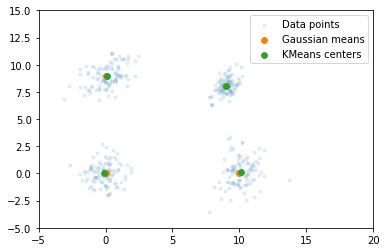

In [7]:
perm = np.random.permutation(X.shape[0])[:3]
init_mu = np.vstack((X[perm], [20, 20]))
kmeans = KMeans(n_clusters=4, init=init_mu, n_init=1).fit(X)

plot(X, mu, kmeans.cluster_centers_)

**f)** Repita os processos **(a)**, **(b)**, **(c)** e **(d)** utilizando o modelo Fuzzy C-Means e compare com os resultados obtidos para o K-Means.

4 centros:


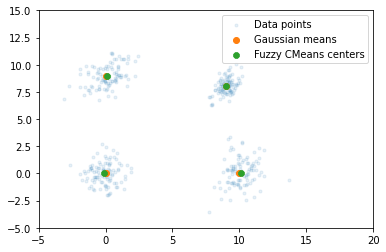

In [8]:
# Exponentiation factor. Using MATLAB's fcm default value
m = 2
tol = 1e-5
max_iter = 1200

print("4 centros:")
centers, *_ = CMeans(X.T, 4, m, tol, max_iter)
plot(X, mu, centers, model='Fuzzy CMeans')

3 centros:


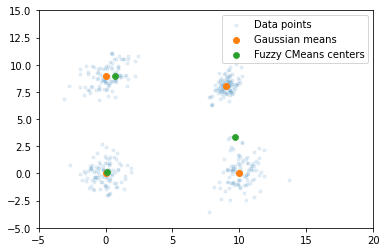

In [9]:
print("3 centros:")
centers, *_ = CMeans(X.T, 3, m, tol, max_iter)
plot(X, mu, centers, model='Fuzzy CMeans')

5 centros:


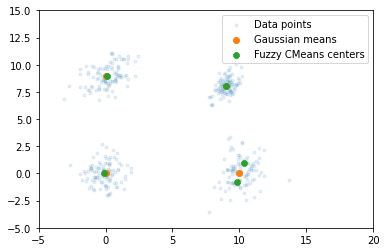

In [10]:
print("5 centros:")
centers, *_ = CMeans(X.T, 5, m, tol, max_iter)
plot(X, mu, centers, model='Fuzzy CMeans')

**g)** Comente os resultados.,

Podemos observar que o ḿetodo KMeans funciona muito bem com o parâmetro $k$ adequado, visto que os dados são explicados por distribuições gaussianas, o que favorece o método. Entretanto, vale ressaltar que um cenário onde o número de clusters é conhecido _a priori_ e os dados são provenientes de distribuições gaussianas não representa bem aplicações reais de _clustering_.

O método Fuzzy C-Means apresentou resultados semelhantes aos obtidos com K-Means convencional.